# 넘파이 어레이: 인덱싱과 슬라이싱

기존의 시퀀스 자료형처럼 인덱싱과 슬라이싱을 이용하여 어레이 항목들을 확인할 수 있다.

## 1차원 어레이의 인덱싱과 슬라이싱

1차원 어레이의 경우 리스트의 인덱싱, 슬라이싱과 동일하게 처리한다. 
다만, 슬라이싱의 경우 리턴값 또한 1차원 어레이이다.

In [1]:
import numpy as np

### 인덱싱

인덱싱은 숫자 0부터 인덱스가 시작하며, `-1`은 마지막 항목을 의미한다. 

In [2]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
a[0], a[2], a[-1]

(0, 2, 9)

### 슬라이싱

두 개의 콜론(':')을 사용하여 슬라이싱 구간의 처음과 끝, 그리고 스텝 
옵션을 지정할 수 있다. -1은 역순으로 나열하는 것을 의미한다. 

In [4]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [5]:
a[2:9:3] # [start:end:step]

array([2, 5, 8])

In [6]:
a[:4]

array([0, 1, 2, 3])

In [7]:
a[1:3]

array([1, 2])

In [8]:
a[::2]

array([0, 2, 4, 6, 8])

In [9]:
a[3:]

array([3, 4, 5, 6, 7, 8, 9])

## 고차원 어레이의 인덱싱과 슬라이싱

### 인덱싱

먼저 중첩 리스트의 경우 인덱싱을 어떻게 하는지 확인해 보자. 

In [10]:
b = [[0, 1, 2], [3, 4, 5]]
len(b)

2

`a`에서 `0`을 뽑아내고자 할 경우 인덱싱을 두 번 연속해서 사용해야 하는데,
이는 `0`이 `a`의 첫째 항목의 첫째 항목이기 때문이다. 즉,

In [11]:
b[0][0]

0

`5`의 경우 둘째 항목의 셋째 항목이다.

In [12]:
b[1][2]

5

반면에 `b`를 이차원 어레이로 다룰 경우에는 다음과 같이 하면 된다.

In [13]:
b = np.array([[0, 1, 2], [3, 4, 5]])
b

array([[0, 1, 2],
       [3, 4, 5]])

In [14]:
b[0, 0]

0

In [15]:
b[1,2]

5

따라서, 다차원 어레이에서 사용되는 인덱싱은 인덱스 숫자들의 튜플을 사용한다.
사용된 튜플의 길이만큼 인덱싱의 대상이 되는 항목들의 차원이 증가한다. 

보다 다양한 예제들을 이용하여 인덱싱을 연습해보자.

In [16]:
d = np.diag(np.arange(3))
d

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

`1`의 위치는 2행 2열이므로 인덱싱을 `(1, 1)`을 이용한다.

In [17]:
d[1, 1]

1

어레이의 특정 항목의 값을 변경할 수 있다.
즉, 어레이는 가변(mutable) 자료형이다. 
예를 들어, 3행 2열 항목값인 0을 10으로 변경하고자 하면 다음과 같이 인덱싱을 이용하면 된다.

In [18]:
d[2, 1] = 10
d

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, 10,  2]])

`d[2]`는 무엇을 의미할까?
`d`를 리스트라 생각하면 이해가 될 것이다.
즉, 3번째 항목인 `[0, 10, 2]`를 가리킨다.

In [19]:
d[2]

array([ 0, 10,  2])

### 슬라이싱

다차원 어레이의 슬라이싱은 좀 더 집중을 요구한다. 
복잡하거나 어렵지는 않지만 항상 집중해야 한다. 

먼저, 다음과 같은 모양의 2차원 어레이를 생성해보자. 
단, 수동으로 항목들을 입력하면 안된다.

<table>
  <tr>
    <td align=center>0</td>
    <td align=center>1</td> 
    <td align=center>2</td>
    <td align=center>3</td>
    <td align=center>4</td>
    <td align=center>5</td>
  </tr>
  <tr>
    <td>10</td>
    <td>11</td> 
    <td>12</td>
    <td>13</td>
    <td>14</td>
    <td>15</td>
  </tr>
  <tr>
    <td>20</td>
    <td>21</td> 
    <td>22</td>
    <td>23</td>
    <td>24</td>
    <td>25</td>
  </tr>
  <tr>
    <td>30</td>
    <td>31</td> 
    <td>32</td>
    <td>33</td>
    <td>34</td>
    <td>35</td>
  </tr>
  <tr>
    <td>40</td>
    <td>41</td> 
    <td>42</td>
    <td>43</td>
    <td>44</td>
    <td>45</td>
  </tr>
  <tr>
    <td>50</td>
    <td>51</td> 
    <td>52</td>
    <td>53</td>
    <td>54</td>
    <td>55</td>
  </tr>
</table>

여러 가지 방법이 있을 수 있으나 shape을 변경하는 방법을 활용하는 것이 가장 기초적이다. 
먼저, `np.arange` 함수를 이용하여 길이가 36인 어레이를 생성한 다음에 
shape 값을 변경하여 2차원 어레이를 생성한다. 

In [20]:
a = np.arange(36)
a.shape = (6,6)
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

`shape`  변경하는 여러 가지 방법이 있다. 

* `shape` 속성을 위와 같이 변경하기.
* `reshape` 메소드 이용하기

In [21]:
a = np.arange(36).reshape((6,6))
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

* `np.reshape` 함수 사용하기 

In [22]:
a = np.arange(36)
a = np.reshape(a, (6,6))
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

이제 각 행별로 4의 배수를 더하면 원하는 어레이가 얻어지는 성질을 이용한다. 
어레이와 숫자의 연산은 각 항목별로 실행된다는 점을 이용한다. 

In [23]:
a = np.arange(36).reshape((6,6))

for i in range(len(a)):
    a[i] = a[i] + 4*i

a

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

* 위 코드를 보다 친숙한 방식으로 구현한다면 다음과 같다.

In [24]:
a = np.arange(36).reshape((6,6))

for i in range(len(a)):
        for j in range(6):
            a[i, j] = a[i, j] + 4*i
            
a            

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

* 보다 간단하지만 고급 기술을 이용하는 방식은 다음과 같다. 
    어레이 연산은 다음 시간에 보다 자세히 다룰 예정이다.

In [25]:
a = np.arange(6) + np.arange(0, 51, 10)[:, np.newaxis]
a

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

이제 위 어레이를 이용하여 슬라이싱을 연습하도록 해보자. 
먼저 아래 그림에 나와 있는대로 슬라이싱을 따라해보면서 슬라이싱이 어떻게 
작동하는지 확인해보자.
코드의 색깔과 어레이 그림에서 표시된 동일한 색을 가진 상자들 사이의 관계를 주시하면 된다.

In [1]:
from IPython.display import Image

Image(filename='images/array-slicing.png', width=370)

FileNotFoundError: [Errno 2] No such file or directory: 'images/array-slicing.png'

**`a[0, 3:5]`** 확인하기

먼저 `a[0]`를 확인한다.

In [27]:
a[0]

array([0, 1, 2, 3, 4, 5])

이제 `a[0][3:5]`를 확인한다.

In [28]:
a[0][3:5]

array([3, 4])

따라서 `a[0, 3:5]` 결과는 아래와 같다.

In [29]:
a[0, 3:5]

array([3, 4])

**a[4:, 4:]**를 앞서의 경우처럼 확인할 수는 없다.
왜냐하면 `a[4:]`가 길이가 2인 어레이이기에 `a[4:][4:]` 는 빈 어레이가 된다.

In [30]:
a[4:]

array([[40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [31]:
a[4:][4:]

array([], shape=(0, 6), dtype=int64)

따라서 1차원 값과 2차원 값을 함께 생각해야 한다. 

* 첫번 째 `'4:'`는 4번 인덱스 행부터 마지막 행까지 전체를 의미한다.
* 두번 째 `'4:'`는 앞서 선택한 4번 인덱스 행부터 마지막 행 각각에서 4번 인덱스 열부터 전체를 나타낸다. 

In [32]:
a[4:, 4:]

array([[44, 45],
       [54, 55]])

위와 비슷한 방식으로 해석하면 아래 코드도 이해할 수 있다.

* `':'` 은 모든 행을 대상으로 삼는 것이고
* `'2'` 는 각 행에서 2번 인덱스 값을 선택한다는 의미이다.

따라서 아래 값이 나온다.

In [33]:
a[:, 2]

array([ 2, 12, 22, 32, 42, 52])

이제 아래 코드를 이해할 수 있어야 한다.

In [34]:
a[2::2, ::2]

array([[20, 22, 24],
       [40, 42, 44]])

인덱싱과 슬라이싱을 적절히 이용하면 원하는 모양의
어레이를 쉽게 구할 수 있다.

In [35]:
c = np.arange(10)

In [36]:
c[5:] = 10
c

array([ 0,  1,  2,  3,  4, 10, 10, 10, 10, 10])

In [37]:
d = np.arange(5)

In [38]:
c[5:] = d[::-1]
c

array([0, 1, 2, 3, 4, 4, 3, 2, 1, 0])

### 연습문제

슬라이싱을 이용하여 아래 기능을 수행하는 함수 `odd_numbers`와 `even_numbers`를 구현하라.

* `odd_numbers` 함수는 양의 정수 `n`을 입력 받아 0부터 n까지의 정수 중에서 홀수를 역순으로
    담은 1차원 어레이를 리턴한다. 
    
        In [31]: odd_numbers(10)
        Out[31]: array([9, 7, 5, 3, 1])
        
* `even_numbers` 함수는 양의 정수 `n`을 입력 받아 0부터 n까지의 정수 중에서 짝수를 
    담은 1차원 어레이를 리턴한다. 
    
        In [32]: even_numbers(10)
        Out[32]: array([0, 2, 4, 6, 8, 10])
        
_힌트_: `linspace` 함수와 슬라이싱을 적절히 활용한다.        

### 연습문제

아래 모양의 어레이를 생성하라. 단, 3줄 이내로 코딩해야 한다.

    [[1, 1, 1, 1],
     [1, 1, 1, 1],
     [1, 1, 1, 2],
     [1, 6, 1, 1]]
     
_힌트_: `np.ones` 함수와 인덱싱 활용.     

### 연습문제

아래 모양의 어레이를 생성하라. 단, 3줄 이내로 코딩해야 한다.

    [[0., 0., 0., 0., 0.],
     [2., 0., 0., 0., 0.],
     [0., 3., 0., 0., 0.],
     [0., 0., 4., 0., 0.],
     [0., 0., 0., 5., 0.],
     [0., 0., 0., 0., 6.]]
     
_힌트_: `np.diag` 함수 활용법을 숙지해야 한다. `dir`나 `?`를 이용하여 `diag` 함수의 
주석(docstring)을 확인해보자.

### 연습문제

아래 모양의 어레이를 생성하라. 단, 3줄 이내로 코딩해야 한다.

    [[4, 3, 4, 3, 4, 3],
     [2, 1, 2, 1, 2, 1],
     [4, 3, 4, 3, 4, 3],
     [2, 1, 2, 1, 2, 1]]
 
_힌트_: `np.tile` 함수 활용법을 숙지해야 한다. `dir`나 `?`를 이용하여 
`tile` 함수의 주석(docstring)을 확인해보자. 
또한 `np.arange` 함수, `reshape` 어레이 메소드 등을 활용할 수 있다.

### 복사와 뷰(copies and views)

슬라이싱을 처리할 때 리스트의 경우와 어레이의 경우가 다르다. 

* 리스트 슬라이싱: 새로운 리스트를 복사(copy)해서 사용한다.
* 어레이 슬라이싱: 어레이를 복사하지 않고 기존의 어레이를 사용하며 관찰(view)한다. 

#### 리스트 슬라이싱: 복사 사용

In [39]:
a = [1, 2, 3]

In [40]:
b = a[0:2]
b

[1, 2]

`b`의 값을 변경해도 `a`는 영향을 받지 않는다.

In [41]:
b[0] = 4
b

[4, 2]

In [42]:
a

[1, 2, 3]

#### 어레이 슬라이싱: 뷰 사용

In [43]:
c = np.array([1,2, 3])

In [44]:
d = c[0:2]
d

array([1, 2])

`d`의 값을 변경하면 `c`의 값도 변경된다.

In [45]:
d[0] = 4
d

array([4, 2])

In [46]:
c

array([4, 2, 3])

어레이를 슬라이싱 하면 어레이를 새로 생성하는 것이 아니라 기존의
어레이를 관찰하며 필요한 정보만 보여준다. 
즉, 슬라이싱을 위해 메모리를 새롭게 사용하지 않는다. 
복사보다 뷰 방식을 사용하는 이유는 처리속도 및 메모리 활용성을 높이기 위해서이다.

두 개의 변수가 동일한 메모리 위치를 가리키고 있는지, 즉,
특정 메모리를 공유하는가를 확인하기 위해 `np.may_share_memory()` 함수를 
이용할 수 있다. 단, 이 함수의 리턴값을 100% 믿을 수는 없다. 

In [47]:
e = np.arange(10)
e

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [48]:
f = e[::2]
f

array([0, 2, 4, 6, 8])

변수 `f`가 뷰 방식을 이용해 변수 `e`와 메모리를 공유한다. 

In [49]:
np.may_share_memory(e, f)

True

따라서 `f`의 값을 변경하면 `e`의 값도 변경된다.

In [50]:
f[0] = 12
f

array([12,  2,  4,  6,  8])

In [51]:
e

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9])

뷰 방식을 사용하지 않으려면 `copy` 메소드를 사용하여 복사해야 한다.

In [52]:
e = np.arange(10)
g = e[::2].copy()
g

array([0, 2, 4, 6, 8])

In [53]:
g[0] = 12
g

array([12,  2,  4,  6,  8])

복사를 사용하엿 `e`는 변하지 않는다.

In [54]:
e

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

`e`와 `g`는 메모리를 공유하지 않는다.

In [55]:
np.may_share_memory(e, g)

False

## 팬시 인덱싱(Fancy indexing)

어레이의 경우 불(bool) 값 또는 정수들의 어레이를 이용하여 인덱싱을 실행할 수 있다. 
이러한 인덱싱을 **팬시 인덱싱**이라 부른다.


_**주의**_

팬시 인덱싱을 사용하면 메모리 복사가 발생한다. 뷰 방식은 어레이 슬라이싱에서만 발생한다. 

### 마스크(mask, 불 값들로 이루어진 어레이) 이용하기

`True`, `False`의 불 값들로만 이루어진 어레이를 마스크(mask)라 부른다. 
마스크를 이용하여 인덱싱을 실행할 수 있다.

##### 예제: 무작위로 생성된 정수들 중에서 3의 배수만 추출하기

무작위로 정수들을 생성하기 위해서는 `np.random.random_integers` 함수를 이용한다. 
앞서 `np.random.rand`의 경우와 마찬가지로 무작위성을 확보하기 위해 `seed` 값을 이용한다.

In [56]:
np.random.seed(5)

이제 0과 20 사이에서 무작위로 15개의 정수를 생성한다.

In [57]:
a = np.random.random_integers(0, 20, 15)
a

array([ 3, 14, 15,  6, 16,  9,  8,  4,  7, 16, 16,  7, 12, 15, 17])

`a`의 항목들이 3의 배수 여부를 알려주는 어레이는 다음처럼 생성할 수 있다.

In [58]:
mask = (a % 3 == 0)
mask

array([ True, False,  True,  True, False,  True, False, False, False,
       False, False, False,  True,  True, False], dtype=bool)

`mask`와 `a`의 길이가 동일하며 `mask`는 `a`의 각 항목의 정수가 3배수 여부를 불 값으로 갖고 있다.
이제 `a`의 항목들 중에서 3배수 정수들만 항목으로 갖는 어레이를 다음과 같이 구할 수 있다.

In [59]:
multiple_3 = a[mask]
multiple_3

array([ 3, 15,  6,  9, 12, 15])

다음처럼 보다 간단한 구현이 가능하다.

In [60]:
a[a % 3 == 0]

array([ 3, 15,  6,  9, 12, 15])

##### 예제: 마스크 인덱싱을 이용하여 특정 항목들의 값 변경하기

예를 들어 생성된 정수들의 어레이어서 3배수값들만을 -1로 변경하고 할 때 마스크 인덱싱 기능을 활용할 수 있다.

In [61]:
a[a % 3 == 0] = -1
a

array([-1, 14, -1, -1, 16, -1,  8,  4,  7, 16, 16,  7, -1, -1, 17])

### 정수들의 어레이로 인덱싱 하기

바로 예를 따라하면서 이해하는 것이 가장 좋은 방법이다.

먼저, `0, 10, ..., 90`으로 구성된 어레이를 생성한다. 

In [62]:
a = np.arange(0, 100, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

이제 다른 정수들의 어레이를 이용한다.
이때 사용되는 정수들은 인덱싱 대상으로 삼는 어레이의 인덱스 값들로 이루어져야 한다. 
그렇지 않으면 `IndexError`가 발생한다.

정수들의 어레이를 이용하여 인덱싱을 하면 각 항목들에 대해 인덱싱을 실행한다.
동일한 인덱스가 반복되면 인덱싱도 반복된다.
따라서 리턴값의 모양은 인덱싱으로 사용된 어레이의 모양과 동일하다.

In [63]:
b = np.array([2, 3, 2, 4, 2])

In [64]:
a[b]

array([20, 30, 20, 40, 20])

인덱싱을 위해 어레이 대신에 리스트를 이용해도 동일한 결과를 얻는다.

In [65]:
c = [2, 3, 2, 4, 2]

In [66]:
a[c]

array([20, 30, 20, 40, 20])

마스크의 경우와 마찬가지로 정수들의 어레이를 이용하여 특정 위치의 값들을 변경할 수 있다.

In [67]:
a[[9, 7]] = -100
a

array([   0,   10,   20,   30,   40,   50,   60, -100,   80, -100])

_**주의**_

앞서 언급하였듯이 정수들의 어레이로 인덱싱을 한 결과는 사용된 정수들의 어레이의 모양과 동일하다.

In [68]:
a = np.arange(10)

In [69]:
idx = np.array([[3, 4], [9, 7]])
idx.shape

(2, 2)

In [70]:
a[idx]

array([[3, 4],
       [9, 7]])

### 예제

아래 그림을 보면서 팬시 인덱싱을 연습해보자.

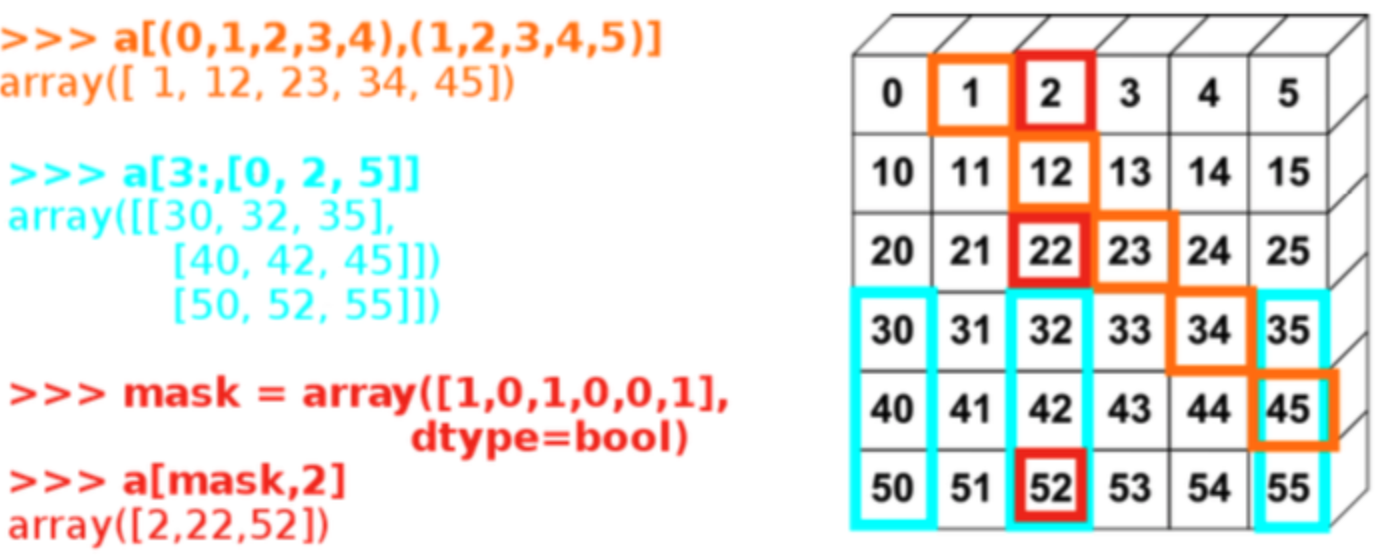

In [71]:
Image(filename='images/fancy-indexing.png', width=400)

In [72]:
a = np.arange(6) + np.arange(0, 51, 10)[:, np.newaxis]
a

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [73]:
a[(0, 1, 2, 3, 4), (1, 2, 3, 4, 5)]

array([ 1, 12, 23, 34, 45])